In [ ]:
!pip install pandas==2.1.1
!pip install scorecardpy==0.1.9.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 952.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60634 sha256=4b2ee8465bd38f5c7fe9b31ed820672ab739779ae16763304c5896162870242c
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorec

In [ ]:
import warnings

import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, metrics

import scorecardpy as sc
import pprint

In [ ]:
# sample code
# data file is the same as Session 7 lab data
full_data = pd.read_csv('final_data.csv')

with pd.option_context('display.max_rows', 6):
    display(full_data)

# use a copy of hmeq_data for credit risk model
full_data_copy = full_data.copy()
full_data_copy["DAYS_CREDIT_INVERSE"] = -full_data_copy["DAYS_CREDIT"]

# check for missing values
full_data_copy.isnull().sum()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,SK_ID_CURR,TARGET,ORGANIZATION_TYPE,DAYS_CREDIT,REGION_POPULATION_RELATIVE,Days_Employed_Positive,LTV_Ratio,Age_at_Loan_Application,Credit_Length,Annuity_Over_Credit,Credit_Utilization_Ratio,AMT_CREDIT
0,100003,0,School,-1400.750000,0.003541,1188,1.145199,170.252055,3.837671,0.027598,0.000000,1293502.5
1,100041,0,Self-employed,-1292.538462,0.008575,1275,1.000000,157.630137,3.541201,0.098910,0.000000,450000.0
2,100088,0,School,-1408.200000,0.022800,4066,1.000000,177.654795,3.858082,0.050000,0.284085,135000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8006,456239,0,Business Entity Type 3,-1529.909091,0.025164,7438,1.198000,181.641096,4.191532,0.029399,0.669159,808650.0
8007,456240,0,Self-employed,-1438.500000,0.004960,2178,1.000000,171.841096,3.941096,0.050000,0.602304,337500.0
8008,456255,0,Business Entity Type 3,-1089.454545,0.046220,1262,1.000000,170.501370,2.984807,0.072767,0.555116,675000.0


SK_ID_CURR                      0
TARGET                          0
ORGANIZATION_TYPE               0
DAYS_CREDIT                   833
REGION_POPULATION_RELATIVE      0
Days_Employed_Positive          0
LTV_Ratio                       7
Age_at_Loan_Application         0
Credit_Length                 833
Annuity_Over_Credit             3
Credit_Utilization_Ratio      868
AMT_CREDIT                      0
DAYS_CREDIT_INVERSE           833
dtype: int64

In [ ]:
# full_data_copy.drop(columns=["SK_ID_CURR", "DAYS_CREDIT", "Credit_Length", "Annuity_Over_Credit"], inplace=True)
# full_data_copy.drop(columns=["SK_ID_CURR","DAYS_CREDIT", "REGION_POPULATION_RELATIVE", "Annuity_Over_Credit"], inplace=True)
full_data_copy.drop(columns=["SK_ID_CURR", "DAYS_CREDIT"], inplace=True)


In [ ]:
full_data_copy["ORGANIZATION_TYPE"].unique()

array(['School', 'Self-employed', 'Government', 'Business Entity Type 3',
       'Trade: type 7', 'Transport: type 4', 'Electricity',
       'Security Ministries', 'Other', 'Mobile', 'Medicine',
       'Kindergarten', 'Police', 'Restaurant', 'Bank', 'Military',
       'Business Entity Type 1', 'Business Entity Type 2', 'Cleaning',
       'Trade: type 3', 'Security', 'Industry: type 11', 'Construction',
       'Industry: type 3', 'Trade: type 2', 'Insurance', 'Advertising',
       'Services', 'Industry: type 7', 'Industry: type 9',
       'Industry: type 10', 'Housing', 'Culture', 'Hotel', 'Telecom',
       'Postal', 'Industry: type 4', 'Agriculture', 'Legal Services',
       'Trade: type 6', 'University', 'Transport: type 3', 'Realtor',
       'Emergency', 'Industry: type 2', 'Transport: type 2',
       'Industry: type 8', 'Trade: type 1', 'Industry: type 1',
       'Religion', 'Trade: type 5', 'Transport: type 1',
       'Industry: type 6', 'Industry: type 5', 'Industry: type 12',
   

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'School' column
full_data_copy['Organisation_Type_Encoded'] = label_encoder.fit_transform(full_data_copy['ORGANIZATION_TYPE'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
full_data_copy.drop(columns=["ORGANIZATION_TYPE"], inplace=True)

In [ ]:
y = 'TARGET'

train, test = sc.split_df(full_data_copy, y, ratio = .7).values()
print(train.shape)
print(test.shape)

(5606, 11)
(2403, 11)


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:92: UserWarning: There are infinite or NaN values in 1 columns, which are replaced with -999.
 (ColumnNames: Credit_Utilization_Ratio)
  warnings.warn(


In [ ]:
#y = 'TARGET'
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    bins = sc.woebin(train, y = y)
print(type(bins)) # bins is a dictionary

# make it easy to read the bins
for variable, bindetails in bins.items():
    print(f'{variable=}')
    display(bindetails) # bindetails is a dataframe
    print('-' * 100)

[INFO] creating woe binning ...
Binning on 5606 rows and 11 columns in 00:00:10
<class 'dict'>
variable='Age_at_Loan_Application'


/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Age_at_Loan_Application,"[-inf,151.0)",314,0.056011,301,13,0.041401,-0.189051,0.001840,0.062472,151.0,False
1,Age_at_Loan_Application,"[151.0,154.0)",714,0.127364,677,37,0.051821,0.046357,0.000279,0.062472,154.0,False
2,Age_at_Loan_Application,"[154.0,168.0)",2465,0.439707,2317,148,0.060041,0.202294,0.019724,0.062472,168.0,False
3,Age_at_Loan_Application,"[168.0,170.0)",306,0.054584,297,9,0.029412,-0.543397,0.012699,0.062472,170.0,False
4,Age_at_Loan_Application,"[170.0,181.0)",1426,0.254370,1365,61,0.042777,-0.154926,0.005697,0.062472,181.0,False
5,Age_at_Loan_Application,"[181.0,inf)",381,0.067963,371,10,0.026247,-0.660507,0.022233,0.062472,inf,False


----------------------------------------------------------------------------------------------------
variable='Credit_Length'


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Credit_Length,missing,580,0.103461,547,33,0.056897,0.145169,0.002328,0.154295,missing,True
1,Credit_Length,"[-inf,1.0)",337,0.060114,305,32,0.094955,0.698534,0.040419,0.154295,1.0,False
2,Credit_Length,"[1.0,1.4000000000000001)",317,0.056547,307,10,0.031546,-0.471153,0.010200,0.154295,1.4000000000000001,False
3,Credit_Length,"[1.4000000000000001,2.4000000000000004)",1081,0.192829,1024,57,0.052729,0.064690,0.000831,0.154295,2.4000000000000004,False
4,Credit_Length,"[2.4000000000000004,3.6)",1555,0.277381,1458,97,0.062379,0.243000,0.018291,0.154295,3.6,False
5,Credit_Length,"[3.6,inf)",1736,0.309668,1687,49,0.028226,-0.585777,0.082226,0.154295,inf,False


----------------------------------------------------------------------------------------------------
variable='Credit_Utilization_Ratio'


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Credit_Utilization_Ratio,missing,599,0.106850,566,33,0.055092,0.111024,0.001385,0.125193,missing,True
1,Credit_Utilization_Ratio,"[-inf,0.40000000000000147)",3211,0.572779,3090,121,0.037683,-0.287026,0.041534,0.125193,0.40000000000000147,False
2,Credit_Utilization_Ratio,"[0.40000000000000147,0.5000000000000016)",421,0.075098,391,30,0.071259,0.385600,0.013314,0.125193,0.5000000000000016,False
3,Credit_Utilization_Ratio,"[0.5000000000000016,0.7000000000000015)",687,0.122547,648,39,0.056769,0.142781,0.002665,0.125193,0.7000000000000015,False
4,Credit_Utilization_Ratio,"[0.7000000000000015,0.9000000000000017)",391,0.069747,350,41,0.104859,0.808749,0.066149,0.125193,0.9000000000000017,False
5,Credit_Utilization_Ratio,"[0.9000000000000017,inf)",297,0.052979,283,14,0.047138,-0.053279,0.000147,0.125193,inf,False


----------------------------------------------------------------------------------------------------
variable='AMT_CREDIT'


/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,400000.0)",1244,0.221905,1188,56,0.045016,-0.101565,0.002187,0.081622,400000.0,False
1,AMT_CREDIT,"[400000.0,700000.0)",1653,0.294863,1538,115,0.069570,0.359804,0.044977,0.081622,700000.0,False
2,AMT_CREDIT,"[700000.0,800000.0)",354,0.063147,337,17,0.048023,-0.033759,0.000071,0.081622,800000.0,False
3,AMT_CREDIT,"[800000.0,1450000.0)",1700,0.303247,1630,70,0.041176,-0.194730,0.010541,0.081622,1450000.0,False
4,AMT_CREDIT,"[1450000.0,inf)",655,0.116839,635,20,0.030534,-0.504783,0.023846,0.081622,inf,False


----------------------------------------------------------------------------------------------------
variable='REGION_POPULATION_RELATIVE'


/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_POPULATION_RELATIVE,"[-inf,0.023)",3465,0.618088,3271,194,0.055988,0.128117,0.010751,0.054543,0.023,False
1,REGION_POPULATION_RELATIVE,"[0.023,0.032)",986,0.175883,938,48,0.048682,-0.019439,0.000066,0.054543,0.032,False
2,REGION_POPULATION_RELATIVE,"[0.032,0.036000000000000004)",542,0.096682,528,14,0.025830,-0.676929,0.032993,0.054543,0.036000000000000004,False
3,REGION_POPULATION_RELATIVE,"[0.036000000000000004,inf)",613,0.109347,591,22,0.035889,-0.337663,0.010733,0.054543,inf,False


----------------------------------------------------------------------------------------------------
variable='Annuity_Over_Credit'


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Annuity_Over_Credit,missing,3,0.000535,3,0,0.000000,1.745905,0.004651,0.079748,missing,True
1,Annuity_Over_Credit,"[-inf,0.028000000000000004)",759,0.135391,737,22,0.028986,-0.561668,0.033388,0.079748,0.028000000000000004,False
2,Annuity_Over_Credit,"[0.028000000000000004,0.04800000000000002)",2208,0.393864,2103,105,0.047554,-0.047282,0.000862,0.079748,0.04800000000000002,False
3,Annuity_Over_Credit,"[0.04800000000000002,0.06400000000000003)",1442,0.257224,1363,79,0.054785,0.101882,0.002795,0.079748,0.06400000000000003,False
4,Annuity_Over_Credit,"[0.06400000000000003,0.09600000000000006)",770,0.137353,713,57,0.074026,0.423448,0.029876,0.079748,0.09600000000000006,False
5,Annuity_Over_Credit,"[0.09600000000000006,inf)",424,0.075633,409,15,0.035377,-0.355787,0.008177,0.079748,inf,False


----------------------------------------------------------------------------------------------------
variable='DAYS_CREDIT_INVERSE'


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT_INVERSE,missing,580,0.103461,547,33,0.056897,0.145169,0.002328,0.162907,missing,True
1,DAYS_CREDIT_INVERSE,"[-inf,350.0)",309,0.055120,279,30,0.097087,0.723096,0.040167,0.162907,350.0,False
2,DAYS_CREDIT_INVERSE,"[350.0,500.0)",314,0.056011,303,11,0.035032,-0.362727,0.006276,0.162907,500.0,False
3,DAYS_CREDIT_INVERSE,"[500.0,1350.0)",2785,0.496789,2625,160,0.057451,0.155448,0.012880,0.162907,1350.0,False
4,DAYS_CREDIT_INVERSE,"[1350.0,1450.0)",284,0.050660,280,4,0.014085,-1.295385,0.049437,0.162907,1450.0,False
5,DAYS_CREDIT_INVERSE,"[1450.0,inf)",1334,0.237959,1294,40,0.029985,-0.523504,0.051818,0.162907,inf,False


----------------------------------------------------------------------------------------------------
variable='Days_Employed_Positive'


/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Days_Employed_Positive,"[-inf,800.0)",1377,0.245630,1286,91,0.066086,0.304678,0.026194,0.059719,800.0,False
1,Days_Employed_Positive,"[800.0,2000.0)",1703,0.303782,1613,90,0.052848,0.067069,0.001408,0.059719,2000.0,False
2,Days_Employed_Positive,"[2000.0,7000.0)",2190,0.390653,2109,81,0.036986,-0.306410,0.032010,0.059719,7000.0,False
3,Days_Employed_Positive,"[7000.0,inf)",336,0.059936,320,16,0.047619,-0.042622,0.000107,0.059719,inf,False


----------------------------------------------------------------------------------------------------
variable='Organisation_Type_Encoded'


/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Organisation_Type_Encoded,"[-inf,4.0)",315,0.056190,302,13,0.041270,-0.192368,0.001908,0.044004,4.0,False
1,Organisation_Type_Encoded,"[4.0,8.0)",1917,0.341955,1815,102,0.053208,0.074242,0.001949,0.044004,8.0,False
2,Organisation_Type_Encoded,"[8.0,12.0)",357,0.063682,345,12,0.033613,-0.405528,0.008754,0.044004,12.0,False
3,Organisation_Type_Encoded,"[12.0,29.0)",486,0.086693,453,33,0.067901,0.333726,0.011241,0.044004,29.0,False
4,Organisation_Type_Encoded,"[29.0,38.0)",860,0.153407,822,38,0.044186,-0.121044,0.002129,0.044004,38.0,False
5,Organisation_Type_Encoded,"[38.0,39.0)",354,0.063147,344,10,0.028249,-0.584946,0.016726,0.044004,39.0,False
6,Organisation_Type_Encoded,"[39.0,inf)",1317,0.234927,1247,70,0.053151,0.073109,0.001298,0.044004,inf,False


----------------------------------------------------------------------------------------------------
variable='LTV_Ratio'


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LTV_Ratio,missing,4,0.000714,4,0,0.000000,1.458223,0.003611,0.077885,missing,True
1,LTV_Ratio,"[-inf,1.06)",2862,0.510524,2737,125,0.043676,-0.136426,0.008938,0.077885,1.06,False
2,LTV_Ratio,"[1.06,1.09)",308,0.054941,300,8,0.025974,-0.674463,0.018630,0.077885,1.09,False
3,LTV_Ratio,"[1.09,1.1500000000000001)",1059,0.188905,1001,58,0.054769,0.101566,0.002040,0.077885,1.1500000000000001,False
4,LTV_Ratio,"[1.1500000000000001,1.2000000000000002)",686,0.122369,655,31,0.045190,-0.100770,0.001188,0.077885,1.2000000000000002,False
5,LTV_Ratio,"[1.2000000000000002,inf)",687,0.122547,631,56,0.081514,0.527924,0.043479,0.077885,inf,False


----------------------------------------------------------------------------------------------------


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    train_woe = sc.woebin_ply(train, bins)
    test_woe = sc.woebin_ply(test, bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [ ]:
with pd.option_context('display.max_rows', 6):
  display(train_woe)

,TARGET,Age_at_Loan_Application_woe,Credit_Length_woe,Credit_Utilization_Ratio_woe,AMT_CREDIT_woe,REGION_POPULATION_RELATIVE_woe,Annuity_Over_Credit_woe,DAYS_CREDIT_INVERSE_woe,Days_Employed_Positive_woe,Organisation_Type_Encoded_woe,LTV_Ratio_woe
0,0,-0.154926,-0.585777,-0.287026,-0.194730,0.128117,-0.561668,-1.295385,0.067069,-0.584946,0.101566
1,0,0.202294,0.243000,-0.287026,0.359804,0.128117,-0.355787,0.155448,0.067069,0.073109,-0.136426
3,0,-0.189051,0.064690,-0.287026,-0.033759,0.128117,-0.047282,0.155448,-0.306410,-0.405528,-0.100770
...,...,...,...,...,...,...,...,...,...,...,...
8006,0,-0.660507,-0.585777,0.142781,-0.194730,-0.019439,-0.047282,-0.523504,-0.042622,0.074242,-0.100770
8007,0,-0.154926,-0.585777,0.142781,-0.101565,0.128117,0.101882,-1.295385,-0.306410,0.073109,-0.136426
8008,0,-0.154926,0.243000,0.142781,0.359804,-0.337663,0.423448,0.155448,0.067069,0.074242,-0.136426


In [ ]:
# sample code
# create the X, y parts of data for train and test
y_train = train_woe.loc[:, y]
X_train = train_woe.loc[:, train_woe.columns != y]
y_test = test_woe.loc[:, y]
X_test = test_woe.loc[:, train_woe.columns != y]

# create a logistic regression model object
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
# print(lr.coef_)
# print(lr.intercept_)
pd.Series(np.concatenate([lr.intercept_, lr.coef_[0]]),
          index = np.concatenate([['intercept'], lr.feature_names_in_]) )

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

intercept                        -2.941009
Age_at_Loan_Application_woe       0.798047
Credit_Length_woe                 0.412883
Credit_Utilization_Ratio_woe      0.756263
AMT_CREDIT_woe                    0.670015
REGION_POPULATION_RELATIVE_woe    0.829710
Annuity_Over_Credit_woe           0.630668
DAYS_CREDIT_INVERSE_woe           0.391181
Days_Employed_Positive_woe        0.754981
Organisation_Type_Encoded_woe     0.781916
LTV_Ratio_woe                     0.814106
dtype: float64

## Generate Scorecard

In [ ]:
# generate a card from the model and bins. The scores will be based on probability of default from the model
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20, basepoints_eq0 = True)
print(type(card))
pprint.pprint(card)

<class 'dict'>
{'AMT_CREDIT':       variable                   bin  points
18  AMT_CREDIT       [-inf,400000.0)    62.0
19  AMT_CREDIT   [400000.0,700000.0)    53.0
20  AMT_CREDIT   [700000.0,800000.0)    60.0
21  AMT_CREDIT  [800000.0,1450000.0)    64.0
22  AMT_CREDIT       [1450000.0,inf)    70.0,
 'Age_at_Loan_Application':                   variable            bin  points
0  Age_at_Loan_Application   [-inf,151.0)    64.0
1  Age_at_Loan_Application  [151.0,154.0)    59.0
2  Age_at_Loan_Application  [154.0,168.0)    55.0
3  Age_at_Loan_Application  [168.0,170.0)    72.0
4  Age_at_Loan_Application  [170.0,181.0)    63.0
5  Age_at_Loan_Application    [181.0,inf)    75.0,
 'Annuity_Over_Credit':                variable                                         bin  points
27  Annuity_Over_Credit                                     missing    28.0
28  Annuity_Over_Credit                 [-inf,0.028000000000000004)    70.0
29  Annuity_Over_Credit  [0.028000000000000004,0.04800000000000002) 

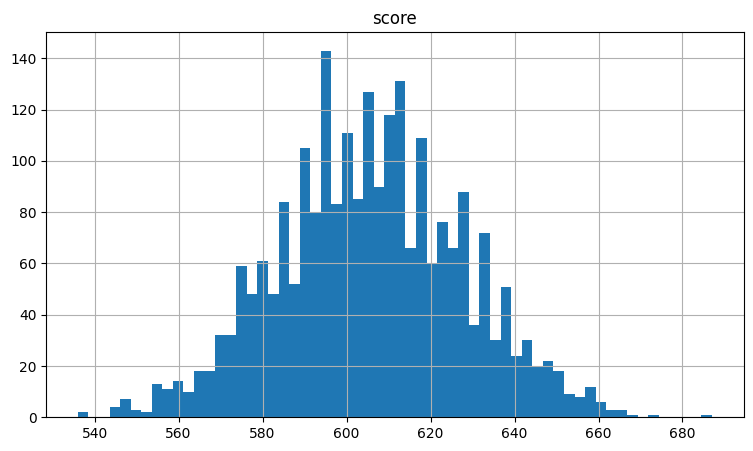

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

# plot the distrubution of scores on test data
test_score.hist(figsize=(9, 5),bins = 60);

## Test

In [ ]:
col = ["Organisation_Type_Encoded", "DAYS_CREDIT", "DAYS_CREDIT_INVERSE", "REGION_POPULATION_RELATIVE", "Days_Employed_Positive", "LTV_Ratio", "Age_at_Loan_Application", "Credit_Length", "Annuity_Over_Credit", "Credit_Utilization_Ratio", "AMT_CREDIT"]
val = [[2, -1123, 1123, 0.00702, 1182, 1, 174.34, 3.572, 0.0753, 0.237, 820500]]
new_appl = pd.DataFrame(val, columns = col)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    new_appl_score = sc.scorecard_ply(new_appl, card, only_total_score = False).transpose()
new_appl_score.index = new_appl_score.index.str.replace('_points', '')

summary = pd.concat([new_appl.transpose(), new_appl_score], axis=1)
summary.columns = ['App Value', 'Points']
print(summary)

                               App Value  Points
Organisation_Type_Encoded        2.00000    64.0
DAYS_CREDIT                  -1123.00000     NaN
DAYS_CREDIT_INVERSE           1123.00000    58.0
REGION_POPULATION_RELATIVE       0.00702    57.0
Days_Employed_Positive        1182.00000    58.0
LTV_Ratio                        1.00000    63.0
Age_at_Loan_Application        174.34000    63.0
Credit_Length                    3.57200    57.0
Annuity_Over_Credit              0.07530    52.0
Credit_Utilization_Ratio         0.23700    66.0
AMT_CREDIT                  820500.00000    64.0
score                                NaN   602.0


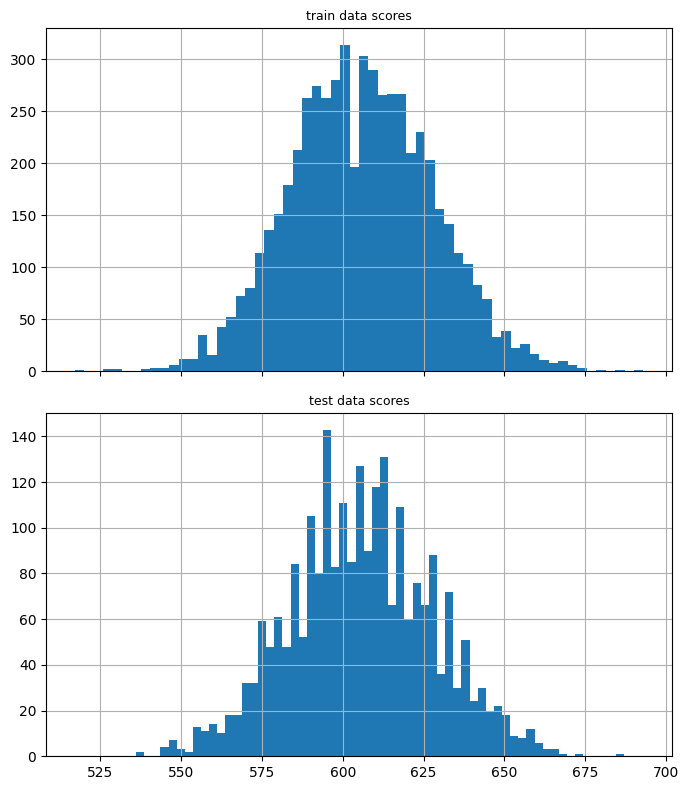

In [ ]:
# credit score for samples in test and train
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    train_score = sc.scorecard_ply(train, card)
    test_score = sc.scorecard_ply(test, card)

# distribution of scores on train and test data
fig, ax = plt.subplots(2, 1, figsize = (7, 8), sharex = True)
train_score.hist(figsize = (7, 4), bins = 60, ax = ax[0])
ax[0].set_title('train data scores', fontsize = 9)
test_score.hist(figsize = (7, 4), bins = 60, ax = ax[1])
ax[1].set_title('test data scores', fontsize = 9)
plt.tight_layout()

In [ ]:
# sample code
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print('PCC measures:')
print(metrics.classification_report(y_test, y_pred))

Confusion matrix:
[[2284    0]
 [ 119    0]]
PCC measures:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2284
           1       0.00      0.00      0.00       119

    accuracy                           0.95      2403
   macro avg       0.48      0.50      0.49      2403
weighted avg       0.90      0.95      0.93      2403



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

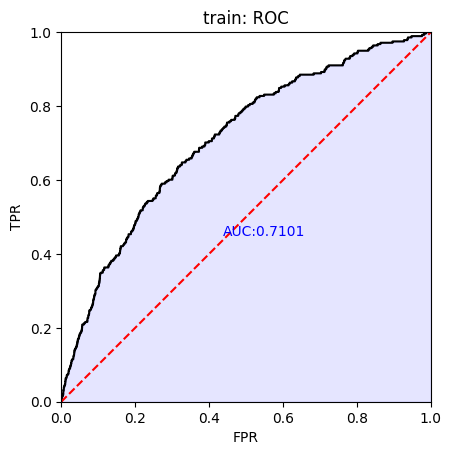

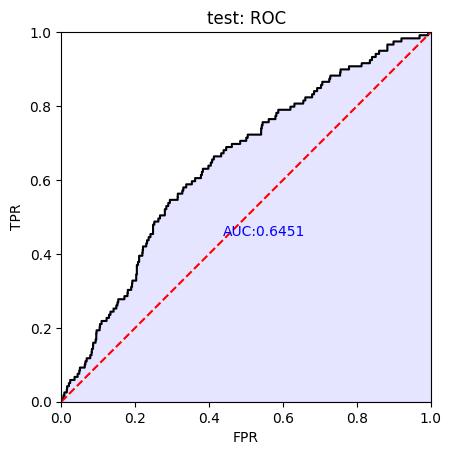

In [ ]:
# sample code

# evaluate the performance of the logistic regression
train_pred = lr.predict_proba(X_train)[:, 1]
test_pred = lr.predict_proba(X_test)[:, 1]

# performance roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type = ['roc'], title = 'train')
test_perf = sc.perf_eva(y_test, test_pred, plot_type = ['roc'], title = 'test')

## Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

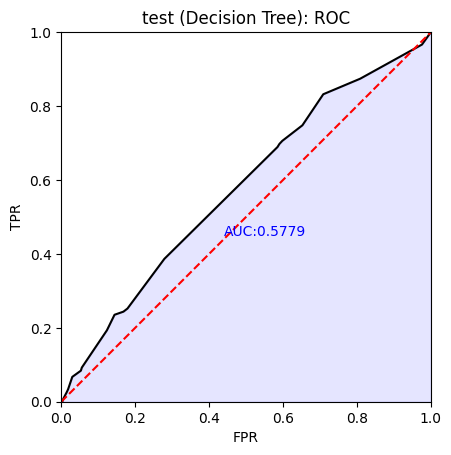

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model object
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=2)  # Adjust hyperparameters as needed
dt_model.fit(X_train, y_train)

# Make predictions on test data
test_pred_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate performance using ROC curve
test_perf_dt = sc.perf_eva(y_test, test_pred_dt, plot_type=['roc'], title='test (Decision Tree)')


In [ ]:
train_woe['TARGET'].unique()

array([0, 1])